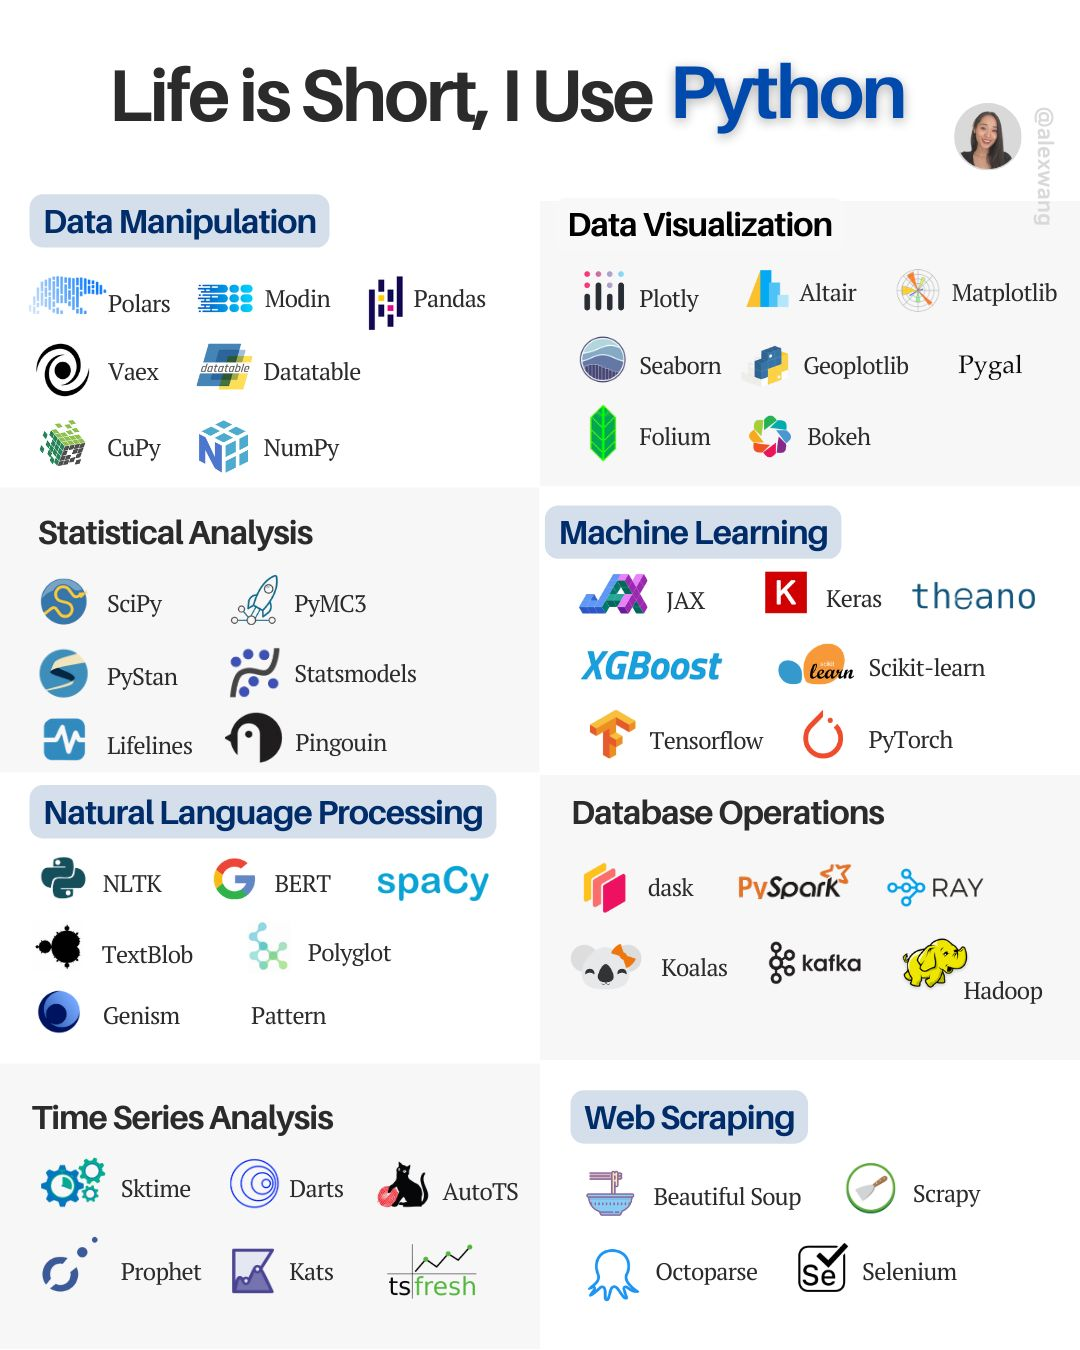

dataset ini menggambarkan seseorang yang masuk kedalam kategori penyakit jantung dan tidak.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#1. Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/latihan/latihan/jantung/heartDisease.csv', index_col=0)
df

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [ ]:
df.shape

(303, 14)

In [ ]:
df.diagnosis.value_counts()

,count
diagnosis,
Jantung,165
Normal,138


#2.Cleaning Data

In [ ]:
df.isnull().sum()

,0
usia,0
jenis kelamin,0
nyeri dada,0
trestbps,0
cholestoral,0
fasting blood sugar,0
restecg,0
denyut jantung,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.dtypes

,0
usia,int64
jenis kelamin,object
nyeri dada,object
trestbps,int64
cholestoral,int64
fasting blood sugar,int64
restecg,int64
denyut jantung,int64
exang,int64
oldpeak,float64


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

#3.Exploratory Data Analysis

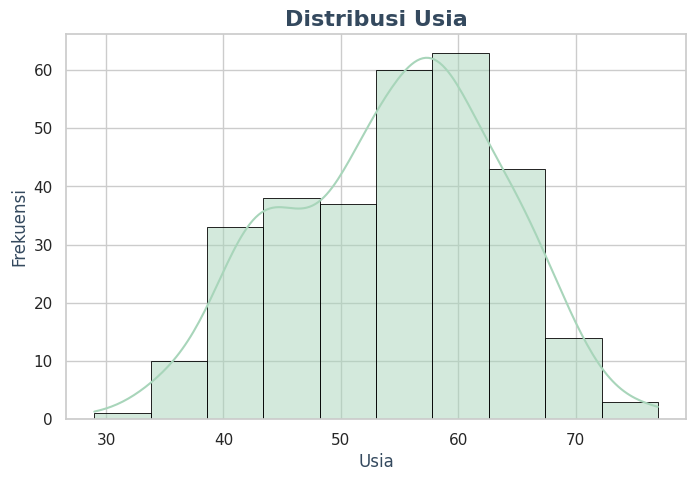

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='usia', bins=10, kde=True, color='#A8D5BA', edgecolor='black', linewidth=0.6)
plt.title('Distribusi Usia', fontsize = 16, fontweight='bold', color='#34495E')
plt.xlabel('Usia', fontsize=12, color='#34495E')
plt.ylabel('Frekuensi', fontsize=12, color='#34495E')
plt.show()


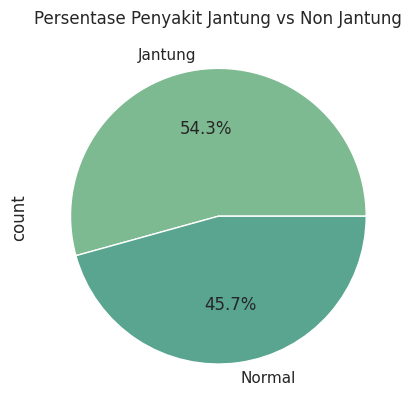

In [ ]:
sns.set_palette("crest")
df['diagnosis'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Persentase Penyakit Jantung vs Non Jantung')
plt.show()

#4.Prepararion Data

In [ ]:
df

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [ ]:
# Import library
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
jk_encoder = LabelEncoder()
nd_encoder = LabelEncoder()
s_encoder = LabelEncoder()

# Mengubah langsung kolom lama (overwrite)
df['jenis kelamin'] = jk_encoder.fit_transform(df['jenis kelamin'])
df['nyeri dada'] = nd_encoder.fit_transform(df['nyeri dada'])
df['slope'] = s_encoder.fit_transform(df['slope'])


# Mapping diagnosis (perhatikan huruf kecil di mapping)
df['diagnosis'] = df['diagnosis'].map({'Jantung': 1, 'Normal': 0})

# Mengecek apakah masih ada NaN
print(df['diagnosis'].isna().sum())  # Mengecek jumlah NaN
print(df.head())  # Menampilkan hasil


0
   usia  jenis kelamin  nyeri dada  trestbps  cholestoral  \
0    63              0           0       145          233   
1    37              0           2       130          250   
2    41              1           1       130          204   
3    56              0           1       120          236   
4    57              1           3       120          354   

   fasting blood sugar  restecg  denyut jantung  exang  oldpeak  slope  ca  \
0                    1        0             150      0      2.3      2   0   
1                    0        1             187      0      3.5      2   0   
2                    0        0             172      0      1.4      0   0   
3                    0        1             178      0      0.8      0   0   
4                    0        1             163      1      0.6      0   0   

   thalium  diagnosis  
0        1          1  
1        2          1  
2        2          1  
3        2          1  
4        2          1  


<ipython-input-13-299dd19a7545>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jenis kelamin'] = jk_encoder.fit_transform(df['jenis kelamin'])
<ipython-input-13-299dd19a7545>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nyeri dada'] = nd_encoder.fit_transform(df['nyeri dada'])
<ipython-input-13-299dd19a7545>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
x = df.drop(columns=('diagnosis'))
y = df['diagnosis']

print("X : ", x.shape)
print("Y : ", y.shape)

X :  (302, 13)
Y :  (302,)


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

####note
<!-- Iya, benar! StandardScaler digunakan untuk menyamakan skala fitur sesuai dengan standar statistik, yaitu:

Mean (rata-rata) menjadi 0.
Standar deviasi menjadi 1.
Tujuannya:
Menghindari bias pada algoritma machine learning yang sensitif terhadap skala data.
Membuat semua fitur memiliki kontribusi yang sama dalam proses perhitungan model. -->

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#5.Modelling & Evaluation (SVM, KNN, Decision tree)

In [ ]:
models = {
    "Decision Tree" : DecisionTreeClassifier(),
    "K-Nearest Neighboars" : KNeighborsClassifier(),
    "Support Vector Machine" :SVC(kernel='linear')
}

In [ ]:
results = []
for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model" : model_name,
        "Accuracy" : accuracy,
        "precision" : report["weighted avg"]["precision"],
        "Recall" : report["weighted avg"]["recall"],
        "F1-Score" : report["weighted avg"]["f1-score"]
    })

evaluation_df = pd.DataFrame(results)
evaluation_df


,Model,Accuracy,precision,Recall,F1-Score
0,Decision Tree,0.802198,0.803452,0.802198,0.802437
1,K-Nearest Neighboars,0.846154,0.849870,0.846154,0.846377
2,Support Vector Machine,0.824176,0.824176,0.824176,0.824176


#6. Testing

In [ ]:
df.sample(5)

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
173,58,0,2,132,224,0,0,173,0,3.2,0,2,3,0
104,50,0,2,129,196,0,1,163,0,0.0,0,0,2,1
179,57,0,3,150,276,0,0,112,1,0.6,1,1,1,0
213,61,1,3,145,307,0,0,146,1,1.0,1,0,3,0
83,52,0,0,152,298,1,1,178,0,1.2,1,0,3,1


In [ ]:
new_data = pd.DataFrame({
    'usia': [57],
    'jenis kelamin': ['Perempuan'],
    'nyeri dada': ['Atypical angina'],
    'trestbps': [130],
    'cholestoral': [230],
    'fasting blood sugar': [0],
    'restecg': [0],
    'denyut jantung': [175],
    'exang': [0],
    'oldpeak': [0.5],
    'slope': ['Flatsloping'],
    'ca': [1],
    'thalium': [2],
})

new_data

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
0,57,Perempuan,Atypical angina,130,230,0,0,175,0,0.5,Flatsloping,1,2


In [ ]:
new_data['jenis kelamin'] = jk_encoder.fit_transform(new_data['jenis kelamin'])
new_data['nyeri dada'] = nd_encoder.fit_transform(new_data['nyeri dada'])
new_data['slope'] = s_encoder.fit_transform(new_data['slope'])

new_data

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
0,57,0,0,130,230,0,0,175,0,0.5,0,1,2


In [ ]:
new_data_scaled = scaler.transform(new_data)

for model_name, model in models.items():
    prediction = model.predict(new_data_scaled)
    hasil_prediksi = "Normal" if prediction[0] == 0 else "Jantung"
    print(f"prediksi Penyakit Oleh {model_name}: {hasil_prediksi}")

prediksi Penyakit Oleh Decision Tree: Jantung
prediksi Penyakit Oleh K-Nearest Neighboars: Jantung
prediksi Penyakit Oleh Support Vector Machine: Jantung
